<b>Data Acquisition</b>

<b>Data Persistence - Azure Database</b>

<b>Retrieve data from the api:</b>

In [2]:
import pandas as pd
expenses = pd.read_json('http://mis5400.westus.azurecontainer.io:5000/api/v1/expenses')
income = pd.read_json('http://mis5400.westus.azurecontainer.io:5000/api/v1/income')

<b>Convert python dictionary to DataFrame:</b>

In [3]:
df1 = pd.DataFrame.from_dict(income, orient='columns')
df2 = pd.DataFrame.from_dict(expenses, orient='columns')

In [5]:
dfIncome = df1.set_index('Year')
dfExpenses = df2.set_index('Year')

<b>Exploration of the Data</b>

In [18]:
list(dfIncome)

['Personal income',
 '  Compensation of employees',
 '    Wages and salaries',
 '      Private industries',
 '      Government',
 '    Supplements to wages and salaries',
 '      Employer contributions for employee pension and insurance ',
 '      Employer contributions for government social insurance',
 "  Proprietors' income with inventory valuation and capital consu",
 '    Farm',
 '    Nonfarm',
 '  Rental income of persons with capital consumption adjustment',
 '  Personal income receipts on assets',
 '    Personal interest income',
 '    Personal dividend income',
 '  Personal current transfer receipts',
 '    Government social benefits to persons',
 '      Social security',
 '      Medicare',
 '      Medicaid',
 '      Unemployment insurance',
 "      Veterans' benefits",
 '      Other',
 '    Other current transfer receipts, from business (net)',
 '  Less: Contributions for government social insurance, domestic',
 'Less: Personal current taxes',
 'Equals: Disposable personal in

In [42]:
list(dfExpenses)

['      Personal consumption expenditures',
 'Goods',
 '  Durable goods',
 '    Motor vehicles and parts',
 '      New motor vehicles',
 '      Net purchases of used motor vehicles',
 '      Motor vehicle parts and accessories',
 '    Furnishings and durable household equipment',
 '      Furniture and furnishings',
 '      Household appliances',
 '      Glassware, tableware, and household utensils',
 '      Tools and equipment for house and garden',
 '    Recreational goods and vehicles',
 '      Video, audio, photographic, and information processing equ',
 '      Sporting equipment, supplies, guns, and ammunition',
 '      Sports and recreational vehicles',
 '      Recreational books',
 '      Musical instruments',
 '    Other durable goods',
 '      Jewelry and watches',
 '      Therapeutic appliances and equipment',
 '      Educational books',
 '      Luggage and similar personal items',
 '      Telephone and related communication equipment',
 '  Nondurable goods',
 '    Food and be

US Consumption (some categories):

In [6]:
dfExpenseSimplified = dfExpenses.filter(['    Motor vehicles and parts',
                                         '    Furnishings and durable household equipment',
                                         '    Recreational goods and vehicles',
                                         '    Other durable goods',
                                         '    Food and beverages purchased for off-premises consumption',
                                         '    Clothing and footwear',
                                         '    Gasoline and other energy goods',
                                         '    Other nondurable goods',
                                         '    Housing and utilities',
                                         '    Health care',
                                         '    Transportation services',
                                         '    Recreation services',
                                         '    Food services and accommodations',
                                         '    Financial services and insurance',
                                         '        Higher education'
                                        ], axis = 1)
list(dfExpenseSimplified)

['    Motor vehicles and parts',
 '    Furnishings and durable household equipment',
 '    Recreational goods and vehicles',
 '    Other durable goods',
 '    Food and beverages purchased for off-premises consumption',
 '    Clothing and footwear',
 '    Gasoline and other energy goods',
 '    Other nondurable goods',
 '    Housing and utilities',
 '    Health care',
 '    Transportation services',
 '    Recreation services',
 '    Food services and accommodations',
 '    Financial services and insurance',
 '        Higher education']

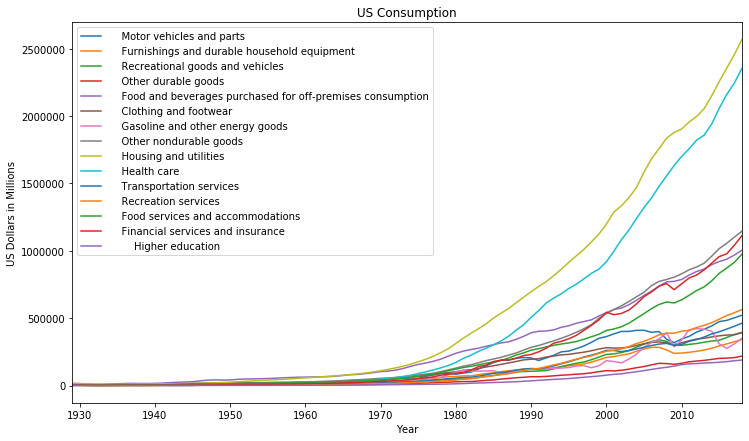

In [16]:
plt.figure(figsize=(12,7))
ax = plt.gca()

dfExpenseSimplified.plot(kind='line', ax=ax)

plt.title('US Consumption')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')
#ax.get_legend().remove()

plt.show()

In [ ]:
US Income:

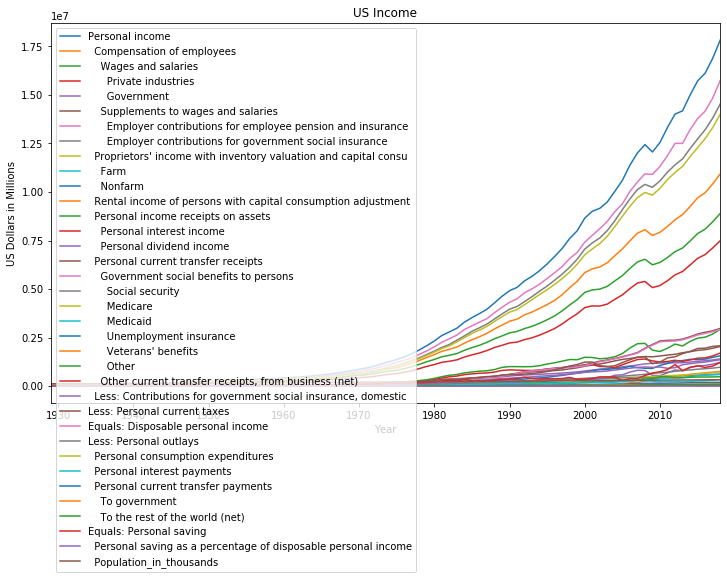

In [62]:
plt.figure(figsize=(12,7))
ax = plt.gca()

dfIncome.plot(kind='line', ax=ax)

plt.title('US Income')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')
#ax.get_legend().remove()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

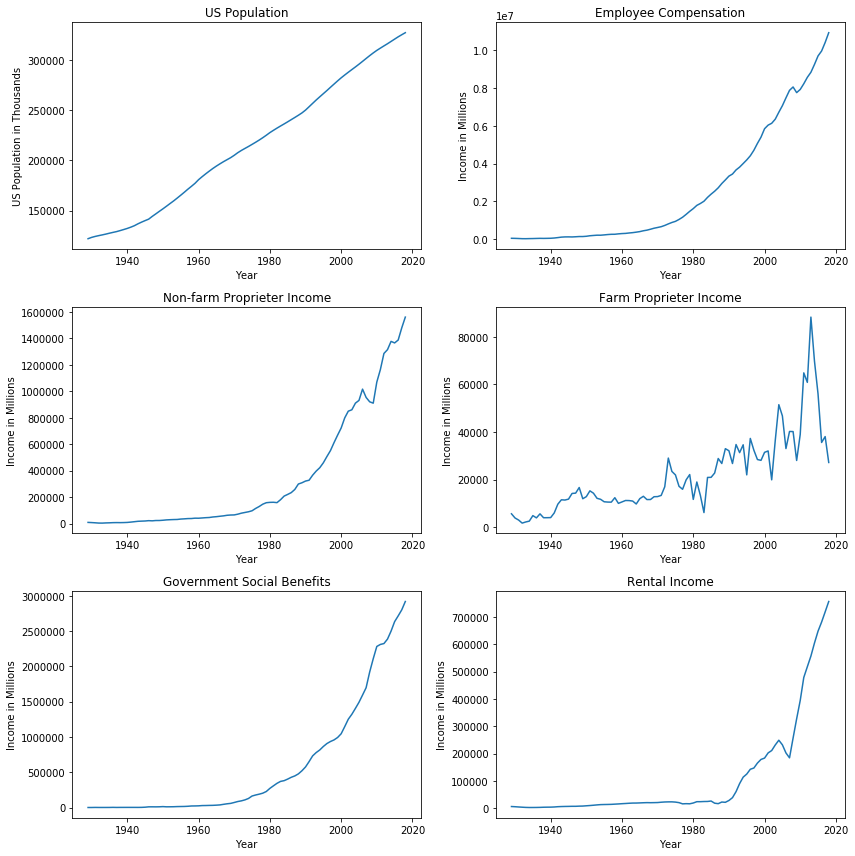

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
plt.plot(dfIncome['  Population_in_thousands'])
plt.title('US Population')
plt.xlabel('Year')
plt.ylabel('US Population in Thousands')

plt.subplot(3,2,2)
plt.plot(dfIncome['  Compensation of employees'] )
plt.title('Employee Compensation')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,3)
plt.plot(dfIncome['    Nonfarm'] )
plt.title('Non-farm Proprieter Income')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,4)
plt.plot(dfIncome['    Farm'] )
plt.title('Farm Proprieter Income')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,5)
plt.plot(dfIncome['    Government social benefits to persons'] )
plt.title('Government Social Benefits')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,6)
plt.plot(dfIncome['  Rental income of persons with capital consumption adjustment'] )
plt.title('Rental Income')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.tight_layout()
plt.show

In [14]:
dfConsumptionMotorVehicles = dfExpenses.filter(['      New motor vehicles',
 '      Net purchases of used motor vehicles',
 '      Motor vehicle parts and accessories'], axis = 1)
dfConsumptionMotorVehicles


,New motor vehicles,Net purchases of used motor vehicles,Motor vehicle parts and accessories
Year,,,
1929,2638,44,648
1930,1672,38,523
1931,1158,34,433
1932,633,28,314
1933,780,29,280
...,...,...,...
2014,264413,110758,66821
2015,276919,127563,69763
2016,275013,137127,71479


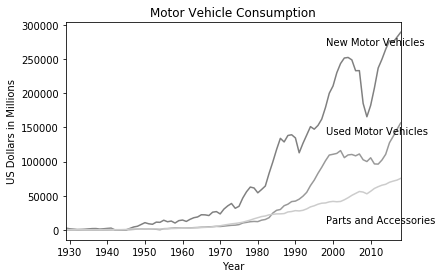

In [21]:
ax = plt.gca()

dfConsumptionMotorVehicles.plot(kind='line', y='      New motor vehicles', Label= 'New Motor Vehicles', color= '.5', ax=ax)
dfConsumptionMotorVehicles.plot(kind='line', y='      Net purchases of used motor vehicles', label= 'Used Motor Vehicles', color='.6', ax=ax)
dfConsumptionMotorVehicles.plot(kind='line', y='      Motor vehicle parts and accessories', label= 'Parts and Accessories', color='.8', ax=ax)
plt.text(1998, 270000, 'New Motor Vehicles')
plt.text(1998, 140000, 'Used Motor Vehicles')
plt.text(1998, 10000, 'Parts and Accessories')
plt.title('Motor Vehicle Consumption')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')
ax.get_legend().remove()

plt.show()

<b>Comparison of Income to Housing and Healthcare Consumption</b>

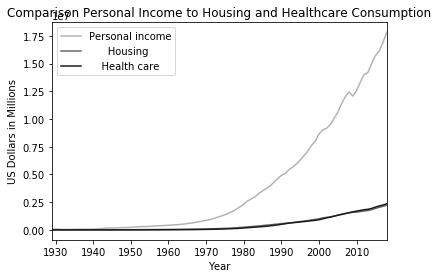

In [177]:
ax = plt.gca()
dfIncome.plot(kind='line', y = 'Personal income', color='.7', ax=ax)
dfExpenses.plot(kind='line', y = '      Housing', color= '.4', ax=ax)
dfExpenses.plot(kind='line', y = '    Health care', color= '.1', ax=ax)
plt.title('Comparison Personal Income to Housing and Healthcare Consumption')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')

plt.show()

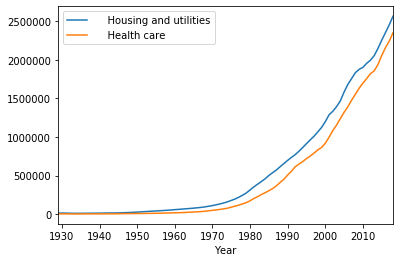

In [22]:
import matplotlib.pyplot as plt

dfExpenseSimplified[['    Housing and utilities','    Health care']].plot()
plt.show()

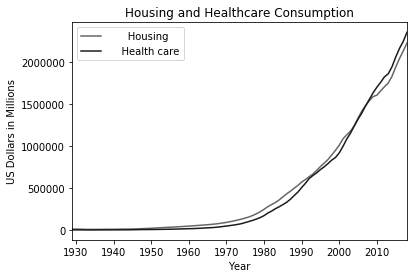

In [26]:
ax = plt.gca()
dfExpenses.plot(kind='line', y = '      Housing', color= '.4', ax=ax)
dfExpenses.plot(kind='line', y = '    Health care', color= '.1', ax=ax)
plt.title('Housing and Healthcare Consumption')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')

plt.show()

<b>Comparison of Income, Housing, and Healthcare Magnitude</b>

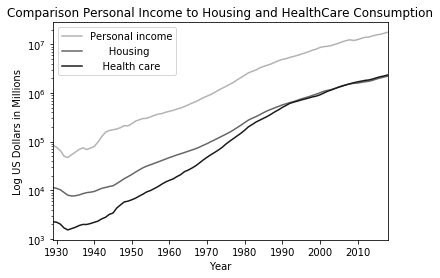

In [176]:
import matplotlib.pyplot as plt

ax = plt.gca()
dfIncome.plot(kind='line', y = 'Personal income', color='.7', ax=ax)
dfExpenses.plot(kind='line', y = '      Housing', color= '.4', ax=ax)
dfExpenses.plot(kind='line', y = '    Health care', color= '.1', ax=ax)
plt.title('Comparison Personal Income to Housing and HealthCare Consumption')
plt.xlabel('Year')
plt.ylabel('Log US Dollars in Millions')
plt.yscale('log')


plt.show()

<b>Average Income, Housing, and Healthcare</b>

In [45]:
IncomeHousing = pd.merge(left=dfIncome['Personal income'],right=dfExpenses['      Housing'], left_on= 'Year', right_on='Year')

In [46]:
IncomeHousingHealthcare = pd.merge(left=IncomeHousing, right=dfExpenses['    Health care'], left_on='Year', right_on='Year') 

In [58]:
#float(IncomeHousingHealthcare.mean(axis=0))
IncomeHousingHealthcare.mean(axis=0)

Personal income    4.024621e+06
      Housing      4.859735e+05
    Health care    4.657982e+05
dtype: float64

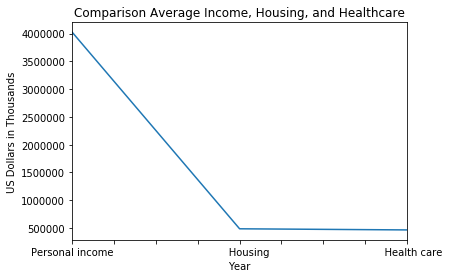

In [59]:
#AverageIncome = dfIncome.mean(axis=0)
#AverageConsumption = dfExpenses.mean(axis=0)
#dfExpenses.mean(axis=0)
ax = plt.gca()
IncomeHousingHealthcare.mean(axis=0).plot(kind='line', ax=ax)
#AverageConsumption.plot(kind='line', y = '      Housing', color= '.4', ax=ax)
#AverageConsumption.plot(kind='line', y = '    Health care', color= '.1', ax=ax)
plt.title('Comparison Average Income, Housing, and Healthcare')
plt.xlabel('Year')
plt.ylabel('US Dollars in Thousands')

plt.show()

<b>Normalize Income, Housing, and HealthCare Data</b>

Normalize a <b>Dataframe</b>

In [7]:
import pandas as pd
from sklearn import preprocessing

x = dfExpenses.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfExpensesNormalized = pd.DataFrame(x_scaled)

In [8]:
import pandas as pd
from sklearn import preprocessing

x = dfIncome.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfIncomeNormalized = pd.DataFrame(x_scaled)

C:\Users\Kristen\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Kristen\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [10]:
dfIncomeNormalized

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.002141,0.001984,0.002419,0.002899,0.000000,0.000092,NaN,0.000006,NaN,0.045155,...,0.002366,0.002266,0.002253,0.003307,0.001924,0.001734,0.002478,0.003559,0.188811,0.000000
1,0.001649,0.001595,0.001940,0.002301,0.000156,0.000095,NaN,0.000005,NaN,0.024801,...,0.001818,0.001716,0.001734,0.001353,0.001561,0.001415,0.002062,0.003044,0.181818,0.006373
2,0.001037,0.000944,0.001143,0.001341,0.000231,0.000076,NaN,0.000002,NaN,0.014832,...,0.001162,0.001041,0.001055,0.000726,0.001049,0.000731,0.001757,0.002613,0.178322,0.011048
3,0.000172,0.000142,0.000168,0.000222,0.000022,0.000032,NaN,0.000006,NaN,0.000000,...,0.000200,0.000199,0.000198,0.000309,0.000578,0.000450,0.001059,0.000210,0.017483,0.014940
4,0.000000,0.000000,0.000000,0.000000,0.000145,0.000000,NaN,0.000000,NaN,0.005475,...,0.000000,0.000000,0.000000,0.000131,0.000271,0.000131,0.000766,0.000000,0.000000,0.018545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.840904,0.845912,0.840479,0.832812,0.881437,0.869515,NaN,0.877355,NaN,0.786538,...,0.838561,0.841611,0.844051,0.723738,0.870324,0.873451,0.866607,0.802076,0.279720,0.957584
86,0.881757,0.887115,0.883535,0.878741,0.909151,0.902667,NaN,0.913976,NaN,0.627010,...,0.875023,0.875734,0.877129,0.784144,0.933824,0.935573,0.931743,0.866511,0.290210,0.968817
87,0.904457,0.911170,0.909136,0.904799,0.932309,0.920006,NaN,0.933208,NaN,0.391369,...,0.899559,0.908532,0.910399,0.812708,0.940235,0.954194,0.923486,0.792212,0.262238,0.979962
88,0.947087,0.952577,0.951869,0.950178,0.960907,0.955655,NaN,0.972458,NaN,0.420005,...,0.942116,0.949669,0.950791,0.888808,0.974341,0.969403,0.980286,0.851758,0.269231,0.990144


In [9]:
import matplotlib.pyplot as plt

ax = plt.gca()
dfIncomeNormalized.plot(kind='line', y = 'Personal income', color='.7', ax=ax)
dfExpensesNormalized.plot(kind='line', y = '      Housing', color= '.4', ax=ax)
dfExpensesNormalized.plot(kind='line', y = '    Health care', color= '.1', ax=ax)
plt.title('Comparison Personal Income to Housing and HealthCare Consumption')
plt.xlabel('Year')
plt.ylabel('Normalization Factor')

plt.show()

KeyError: 'Personal income'

Normalize <b>ARRAYS</b> of Housing, Personal income, and Health care attributes

In [6]:
from sklearn import preprocessing
import numpy as np

x_array = np.array(df2['      Housing'])
normalized_Housing = preprocessing.normalize([x_array])
y_array = np.array(df1['Personal income'])
normalized_Income = preprocessing.normalize([y_array])
z_array = np.array(df2['    Health care'])
normalized_Healthcare = preprocessing.normalize([z_array])

In [144]:
#normalized_Housing
#normalized_Income
normalized_Healthcare

array([[2.93314973e-04, 2.87448673e-04, 2.62288767e-04, 2.18356702e-04,
        1.99454181e-04, 2.12490402e-04, 2.25787348e-04, 2.45602404e-04,
        2.58377900e-04, 2.58117176e-04, 2.69719413e-04, 2.85753964e-04,
        3.02309965e-04, 3.36334502e-04, 3.62276582e-04, 4.15073277e-04,
        4.42710065e-04, 5.63164747e-04, 6.52462861e-04, 7.51147054e-04,
        7.78653481e-04, 8.32884160e-04, 8.96109832e-04, 9.91404607e-04,
        1.08969771e-03, 1.21067384e-03, 1.29110733e-03, 1.41847121e-03,
        1.55991421e-03, 1.74750543e-03, 1.93340194e-03, 2.08983659e-03,
        2.23180104e-03, 2.49461125e-03, 2.73460808e-03, 3.14811701e-03,
        3.39424086e-03, 3.73852746e-03, 4.16220464e-03, 4.76812820e-03,
        5.48277383e-03, 6.21358438e-03, 7.00370974e-03, 7.80126574e-03,
        8.75708146e-03, 9.91834803e-03, 1.16022367e-02, 1.32772607e-02,
        1.50817344e-02, 1.71037827e-02, 1.94029810e-02, 2.23781073e-02,
        2.63218249e-02, 2.93552232e-02, 3.29979344e-02, 3.604215

In [155]:
Year = np.array(df2['Year'])
Year.shape

(90,)

<b>Create a Dataframe for Normalized Arrays</b>

In [173]:
li = [[normalized_Income, normalized_Housing, normalized_Healthcare]]
IncomeHousingHealthcare = pd.DataFrame(li, columns = ['Personal Income', 'Housing', 'Healthcare'], index =  Year )
IncomeHousingHealthcare

,Personal Income,Housing,Healthcare
1929,"[[0.0013958931370610694, 0.0012525869626645266...","[[0.001515622864783089, 0.0014549607830519739,...","[[0.00029331497262593506, 0.000287448673173416..."
1930,"[[0.0013958931370610694, 0.0012525869626645266...","[[0.001515622864783089, 0.0014549607830519739,...","[[0.00029331497262593506, 0.000287448673173416..."
1931,"[[0.0013958931370610694, 0.0012525869626645266...","[[0.001515622864783089, 0.0014549607830519739,...","[[0.00029331497262593506, 0.000287448673173416..."
1932,"[[0.0013958931370610694, 0.0012525869626645266...","[[0.001515622864783089, 0.0014549607830519739,...","[[0.00029331497262593506, 0.000287448673173416..."
1933,"[[0.0013958931370610694, 0.0012525869626645266...","[[0.001515622864783089, 0.0014549607830519739,...","[[0.00029331497262593506, 0.000287448673173416..."
...,...,...,...
2014,"[[0.0013958931370610694, 0.0012525869626645266...","[[0.001515622864783089, 0.0014549607830519739,...","[[0.00029331497262593506, 0.000287448673173416..."
2015,"[[0.0013958931370610694, 0.0012525869626645266...","[[0.001515622864783089, 0.0014549607830519739,...","[[0.00029331497262593506, 0.000287448673173416..."
2016,"[[0.0013958931370610694, 0.0012525869626645266...","[[0.001515622864783089, 0.0014549607830519739,...","[[0.00029331497262593506, 0.000287448673173416..."
2017,"[[0.0013958931370610694, 0.0012525869626645266...","[[0.001515622864783089, 0.0014549607830519739,...","[[0.00029331497262593506, 0.000287448673173416..."


<b>Plot normalized arrays without a dataframe</b>

In [163]:
Year.shape

(90,)

In [139]:
normalized_Healthcare.shape

(1, 90)

In [140]:
normalized_Income.shape

(1, 90)

In [141]:
normalized_Housing.shape

(1, 90)

ValueError: x and y must have same first dimension, but have shapes (90,) and (1, 90)

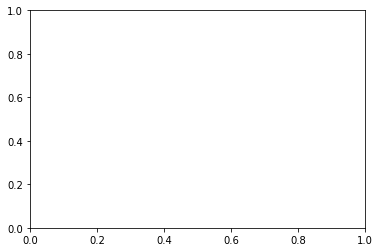

In [167]:
plt.plot(Year, normalized_Housing, label = 'Housing')
plt.plot(Year, normalized_Healthcare, label = 'Healthcare')
plt.plot(Year, normalized_Income, label = 'Personal Income')
#plt.plot(Healthcare)
#plt.plot(Income)
plt.show

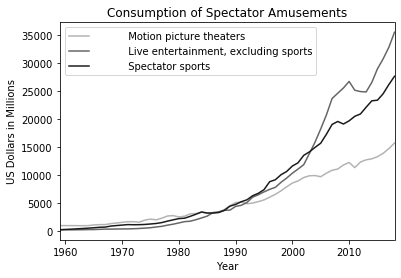

In [80]:
ax = plt.gca()
dfExpensesYearly.plot(kind='line', y='          Motion picture theaters', color='.7', ax=ax)
dfExpensesYearly.plot(kind='line', y='          Live entertainment, excluding sports', color= '.4', ax=ax)
dfExpensesYearly.plot(kind='line', y='          Spectator sports', color= '.1', ax=ax)
plt.text(2003, 500000, '')
plt.text(1975, 800000, '')
plt.text(1998, 200000, '')
plt.title('Consumption of Spectator Amusements')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')




plt.show()

<b>Correlations:</b>

In [60]:
ExpenseCorr = dfExpenseSimplified.corr(method ='pearson') 
ExpenseCorr

,Motor vehicles and parts,Furnishings and durable household equipment,Recreational goods and vehicles,Other durable goods,Food and beverages purchased for off-premises consumption,Clothing and footwear,Gasoline and other energy goods,Other nondurable goods,Housing and utilities,Health care,Transportation services,Recreation services,Food services and accommodations,Financial services and insurance,Higher education
Motor vehicles and parts,1.000000,0.992212,0.980488,0.972630,0.979733,0.991156,0.922157,0.968540,0.972087,0.954379,0.984169,0.961780,0.966762,0.968172,0.939901
Furnishings and durable household equipment,0.992212,1.000000,0.994227,0.987094,0.990319,0.989279,0.951155,0.983751,0.986460,0.972214,0.990278,0.977676,0.981004,0.982211,0.962300
Recreational goods and vehicles,0.980488,0.994227,1.000000,0.993283,0.985948,0.975850,0.960560,0.991583,0.992349,0.984427,0.993170,0.989580,0.985355,0.991687,0.979832
Other durable goods,0.972630,0.987094,0.993283,1.000000,0.993270,0.974593,0.969542,0.998377,0.999097,0.995524,0.995620,0.996673,0.996830,0.997443,0.991505
Food and beverages purchased for off-premises consumption,0.979733,0.990319,0.985948,0.993270,1.000000,0.988884,0.967567,0.989812,0.993331,0.982870,0.990920,0.983768,0.991276,0.986288,0.975246
Clothing and footwear,0.991156,0.989279,0.975850,0.974593,0.988884,1.000000,0.942756,0.966523,0.973201,0.953540,0.979601,0.958386,0.967693,0.963904,0.940133
Gasoline and other energy goods,0.922157,0.951155,0.960560,0.969542,0.967567,0.942756,1.000000,0.961593,0.964451,0.958675,0.950879,0.957253,0.958018,0.958597,0.965058
Other nondurable goods,0.968540,0.983751,0.991583,0.998377,0.989812,0.966523,0.961593,1.000000,0.999298,0.998090,0.995524,0.998908,0.997929,0.999067,0.994313
Housing and utilities,0.972087,0.986460,0.992349,0.999097,0.993331,0.973201,0.964451,0.999298,1.000000,0.996827,0.996175,0.997585,0.998050,0.998050,0.991963
Health care,0.954379,0.972214,0.984427,0.995524,0.982870,0.953540,0.958675,0.998090,0.996827,1.000000,0.990109,0.998996,0.996821,0.997502,0.997438


<b>Heat Map of Consumption Correlation on itself:</b>

<b>Higher Education consumption is possitively correlated with Healthcare consumption and negatively correlated with Motor vehicle and parts consumption and Clothing and Footwear.</b>

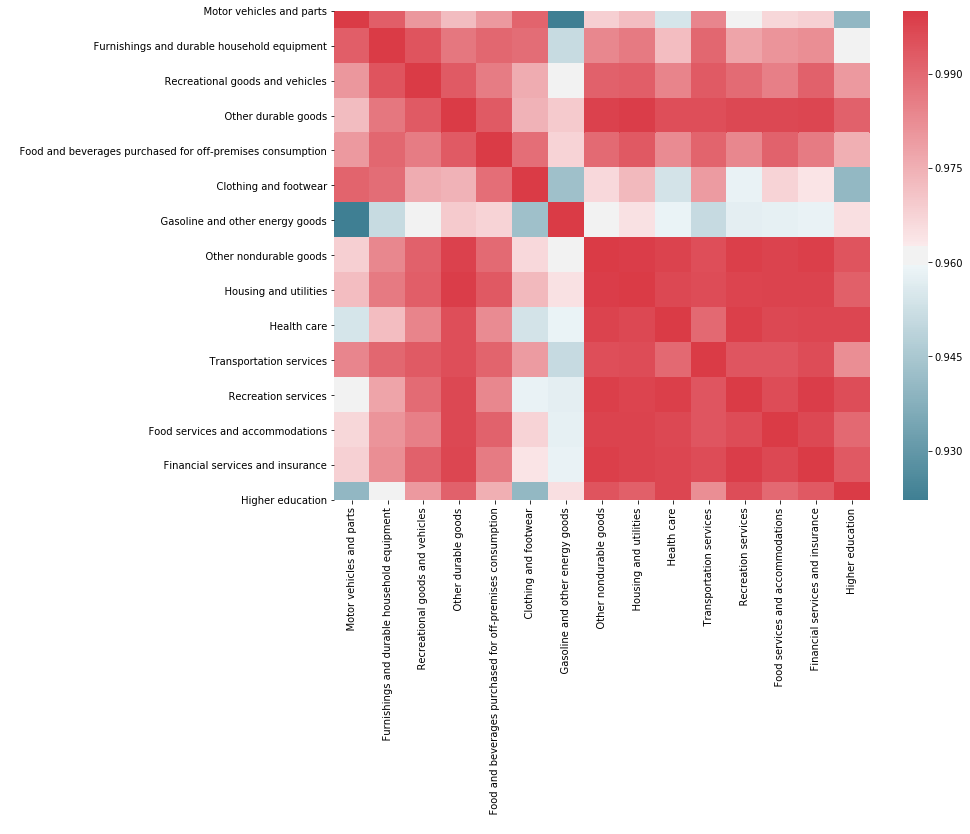

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.heatmap(ExpenseCorr, xticklabels=ExpenseCorr.columns, yticklabels=ExpenseCorr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [27]:
from platform import python_version

print(python_version())

import sys
sys.executable

3.7.4


'C:\\Users\\Kristen\\Anaconda3\\python.exe'